In [1]:
import os
path = '.\Financial_Keys_of_banks_form(2009_to_2017)'
os.listdir(path)

['Allied_Bank.csv',
 'Askari_Bank.csv',
 'Bank_Alfalah.csv',
 'Bank_Al_Habib.csv',
 'Faysal_Bank.csv',
 'Habib_Bank.csv',
 'Habib_Metropolitan_Bank.csv',
 'JS Bank.csv',
 'MCB_Bank.csv',
 'Meezan Bank.csv',
 'Silk_Bank.csv',
 'Soneri_Bank.csv',
 'Standard_Chartered.csv',
 'Summit_Bank.csv',
 'United_Bank.csv']

In [2]:
import pandas as pd
files =[file for file in os.listdir(path)if not file.startswith('.')]
all_banks_data =pd.DataFrame()

for file in files:
    raw_data=pd.read_csv(path+'/'+file,encoding='latin1')
    all_banks_data =pd.concat([all_banks_data,raw_data],ignore_index=True,axis=0)
    
all_banks_data.to_csv('all_data.csv',index=False)

In [3]:
all_banks_data.head(10)

,Symbol,Year,Year End,Share Capital,Face Value,Shares,Equity,Assets,Sales,Interest Ex.,EBT,Net Income,EPS,Dividend %
0,ABL,2017,2017-12-31,11450.74,10,1145.07,78643.3,1245712.11,74580.56,0,20878.7,12733.64,11.12,70
1,ABL,2016,2016-12-31,11450.74,10,1145.07,74474.47,1069614.41,75816.51,0,23831.22,14427.05,12.6,72.5
2,ABL,2015,2015-12-31,11450.74,10,1145.07,67968.65,991665.51,81871.37,0,25503.38,15120.31,13.2,70
3,ABL,2014,2014-12-31,11450.74,10,1145.07,62053.78,842269.13,79737.25,0,22201.76,15015.09,13.11,65
4,ABL,2013,2013-12-31,10409.76,10,1040.98,53703.49,734195.94,63824.76,0,14760.9,14643.36,14.07,52.5
5,ABL,2012,2012-12-31,9463.42,10,946.34,42928.08,631915.5,63296.23,0,15870.35,11675.81,12.34,65
6,ABL,2011,2011-12-31,8603.11,10,860.31,37620.36,515698.94,58764.09,0,15108.48,10139.68,11.79,50
7,ABL,2010,2010-12-31,7821.01,10,782.1,31166.45,449931.53,50664.48,0,12343.11,8225.33,10.52,40
8,ABL,2009,2009-12-31,7110.01,10,711,25891.28,418374.34,47079.54,0,10536.12,7122.17,10.02,40
9,AKBL,2017,2017-12-31,12602.6,10,1260.26,27400.9,656708.37,42522.7,0,8491.8,5267.89,4.18,10


In [4]:
nan_df=all_banks_data[all_banks_data.isna().any(axis=1)]
display(nan_df.head())

,Symbol,Year,Year End,Share Capital,Face Value,Shares,Equity,Assets,Sales,Interest Ex.,EBT,Net Income,EPS,Dividend %


In [5]:
all_banks_data =all_banks_data.dropna(how='all')
all_banks_data.head()

,Symbol,Year,Year End,Share Capital,Face Value,Shares,Equity,Assets,Sales,Interest Ex.,EBT,Net Income,EPS,Dividend %
0,ABL,2017,2017-12-31,11450.74,10,1145.07,78643.3,1245712.11,74580.56,0,20878.7,12733.64,11.12,70
1,ABL,2016,2016-12-31,11450.74,10,1145.07,74474.47,1069614.41,75816.51,0,23831.22,14427.05,12.6,72.5
2,ABL,2015,2015-12-31,11450.74,10,1145.07,67968.65,991665.51,81871.37,0,25503.38,15120.31,13.2,70
3,ABL,2014,2014-12-31,11450.74,10,1145.07,62053.78,842269.13,79737.25,0,22201.76,15015.09,13.11,65
4,ABL,2013,2013-12-31,10409.76,10,1040.98,53703.49,734195.94,63824.76,0,14760.9,14643.36,14.07,52.5


In [6]:
all_banks_data['Symbol'].unique()

array(['ABL', 'AKBL', '\xa0 BAFL', 'BAHL', 'FABL', '\xa0 HBL', 'HMB',
       '\xa0 JSBL', 'MCB', '\xa0 MEBL', '\xa0 SILK', 'SNBL', 'SCBL',
       '\xa0 SMBL', 'UBL'], dtype=object)

In [7]:
all_banks_data['Year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, '\xa0 2017',
       '\xa0 2016', '\xa0 2015', '\xa0 2014', '\xa0 2013', '\xa0 2012',
       '\xa0 2011', '\xa0 2010', '\xa0 2009'], dtype=object)

In [8]:
cols=['Symbol','Year','Year End','Share Capital','Face Value','Shares','Equity','Assets','Sales','Interest Ex.','EBT','Net Income','EPS','Dividend %']
for col in cols:
    all_banks_data[col]=all_banks_data[col].map(lambda x: str(x).lstrip('\xa0 ').rstrip('\xa0 ')).astype(str)

In [9]:
all_banks_data['Year'].unique()

array(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009'], dtype=object)

In [10]:
all_banks_data['TATO']=all_banks_data['Sales'].astype(float)/all_banks_data['Assets'].astype(float)*100

In [11]:
all_banks_data['Sales']=pd.to_numeric(all_banks_data['Sales'])

In [12]:
all_banks_data['Assets']=pd.to_numeric(all_banks_data['Assets'])

In [13]:
all_banks_data.groupby(['Symbol']).sum()

,Assets,Sales,TATO
Symbol,,,
ABL,6899377.41,595634.79,83.416305
AKBL,3919508.25,327437.91,78.565753
BAFL,5967830.40,505889.02,80.266877
BAHL,4738552.70,392232.53,78.548381
FABL,3159788.43,284727.85,83.759593
HBL,14753323.61,1210263.15,77.962881
HMB,3448561.48,312886.92,86.188999
JSBL,1368740.96,104626.87,74.612051
MCB,7641802.82,712394.53,87.347022


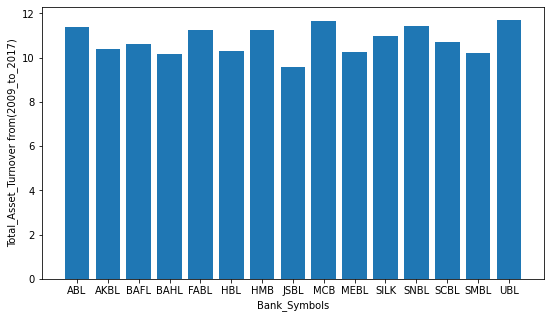

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))

x ='Symbol'
y ='TATO'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Asset_Turnover from(2009_to_2017)")

plt.show()

In [15]:
all_banks_data['Net Income']=pd.to_numeric(all_banks_data['Net Income'])

In [16]:
all_banks_data['ROA']=all_banks_data['Net Income'].astype(float)/all_banks_data['Assets'].astype(float)*100

In [17]:
all_banks_data.groupby(['Symbol']).sum()

,Assets,Sales,Net Income,TATO,ROA
Symbol,,,,,
ABL,6899377.41,595634.79,109102.44,83.416305,15.017276
AKBL,3919508.25,327437.91,19001.01,78.565753,3.660968
BAFL,5967830.40,505889.02,44031.56,80.266877,6.129001
BAHL,4738552.70,392232.53,52115.64,78.548381,10.114412
FABL,3159788.43,284727.85,22459.46,83.759593,6.034574
HBL,14753323.61,1210263.15,197595.77,77.962881,13.019959
HMB,3448561.48,312886.92,39978.68,86.188999,10.492278
JSBL,1368740.96,104626.87,6552.09,74.612051,1.565622
MCB,7641802.82,712394.53,188454.98,87.347022,23.248729


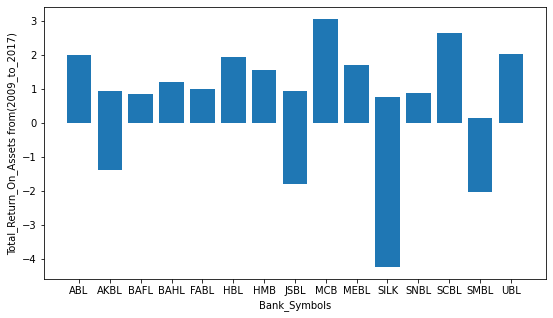

In [18]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='ROA'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Return_On_Assets from(2009_to_2017)")

plt.show()

In [19]:
all_banks_data['Share Capital']=pd.to_numeric(all_banks_data['Share Capital'])

In [20]:
all_banks_data['ROE']=all_banks_data['Net Income'].astype(float)/all_banks_data['Share Capital'].astype(float)*100

In [21]:
all_banks_data.groupby(['Symbol']).sum()

,Share Capital,Assets,Sales,Net Income,TATO,ROA,ROE
Symbol,,,,,,,
ABL,89210.27,6899377.41,595634.79,109102.44,83.416305,15.017276,1087.619380
AKBL,89714.80,3919508.25,327437.91,19001.01,78.565753,3.660968,186.590673
BAFL,131256.09,5967830.40,505889.02,44031.56,80.266877,6.129001,292.650688
BAHL,86873.72,4738552.70,392232.53,52115.64,78.548381,10.114412,527.158865
FABL,88974.59,3159788.43,284727.85,22459.46,83.759593,6.034574,213.597495
HBL,114279.33,14753323.61,1210263.15,197595.77,77.962881,13.019959,1540.273016
HMB,89607.70,3448561.48,312886.92,39978.68,86.188999,10.492278,397.164514
JSBL,88628.10,1368740.96,104626.87,6552.09,74.612051,1.565622,55.973572
MCB,87434.16,7641802.82,712394.53,188454.98,87.347022,23.248729,1952.843302


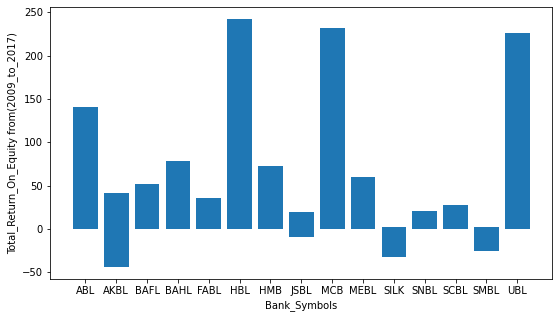

In [22]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='ROE'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Return_On_Equity from(2009_to_2017)")

plt.show()

In [23]:
all_banks_data['Profit_Margin']=all_banks_data['ROA'].astype(float)/all_banks_data['TATO'].astype(float)*100
all_banks_data.groupby(['Symbol']).sum()

,Share Capital,Assets,Sales,Net Income,TATO,ROA,ROE,Profit_Margin
Symbol,,,,,,,,
ABL,89210.27,6899377.41,595634.79,109102.44,83.416305,15.017276,1087.619380,163.408772
AKBL,89714.80,3919508.25,327437.91,19001.01,78.565753,3.660968,186.590673,44.508081
BAFL,131256.09,5967830.40,505889.02,44031.56,80.266877,6.129001,292.650688,72.967833
BAHL,86873.72,4738552.70,392232.53,52115.64,78.548381,10.114412,527.158865,117.401533
FABL,88974.59,3159788.43,284727.85,22459.46,83.759593,6.034574,213.597495,68.948545
HBL,114279.33,14753323.61,1210263.15,197595.77,77.962881,13.019959,1540.273016,148.103928
HMB,89607.70,3448561.48,312886.92,39978.68,86.188999,10.492278,397.164514,111.705909
JSBL,88628.10,1368740.96,104626.87,6552.09,74.612051,1.565622,55.973572,21.294508
MCB,87434.16,7641802.82,712394.53,188454.98,87.347022,23.248729,1952.843302,238.923377


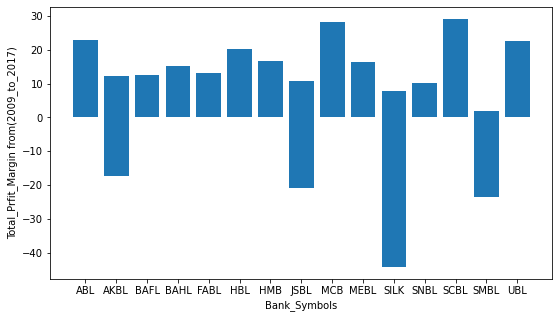

In [24]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='Profit_Margin'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Prfit_Margin from(2009_to_2017)")

plt.show()

In [25]:
all_banks_data['Capital_Intensity']=all_banks_data['Assets'].astype(float)/all_banks_data['Sales'].astype(float)*100

In [26]:
all_banks_data.head()

,Symbol,Year,Year End,Share Capital,Face Value,Shares,Equity,Assets,Sales,Interest Ex.,EBT,Net Income,EPS,Dividend %,TATO,ROA,ROE,Profit_Margin,Capital_Intensity
0,ABL,2017,2017-12-31,11450.74,10,1145.07,78643.3,1245712.11,74580.56,0,20878.7,12733.64,11.12,70,5.986982,1.022198,111.203643,17.073672,1670.290636
1,ABL,2016,2016-12-31,11450.74,10,1145.07,74474.47,1069614.41,75816.51,0,23831.22,14427.05,12.6,72.5,7.088209,1.348808,125.992294,19.028903,1410.793520
2,ABL,2015,2015-12-31,11450.74,10,1145.07,67968.65,991665.51,81871.37,0,25503.38,15120.31,13.2,70,8.255946,1.524739,132.046575,18.468373,1211.248218
3,ABL,2014,2014-12-31,11450.74,10,1145.07,62053.78,842269.13,79737.25,0,22201.76,15015.09,13.11,65,9.466956,1.782695,131.127683,18.830710,1056.305717
4,ABL,2013,2013-12-31,10409.76,10,1040.98,53703.49,734195.94,63824.76,0,14760.9,14643.36,14.07,52.5,8.693151,1.994476,140.669526,22.943071,1150.330906


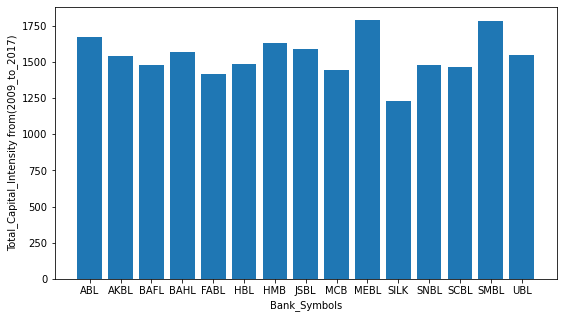

In [27]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='Capital_Intensity'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Capital_Intensity from(2009_to_2017)")

plt.show()

In [28]:
all_banks_data['EPS']=pd.to_numeric(all_banks_data['EPS'])

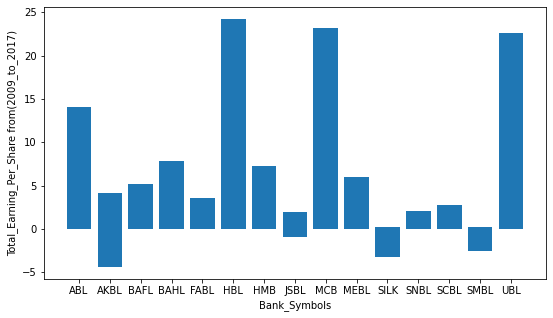

In [29]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='EPS'
plt.bar(x,y,data=all_banks_data)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Earning_Per_Share from(2009_to_2017)")

plt.show()

In [33]:
all_banks_data['Dividens %']=pd.to_numeric(all_banks_data['Dividend %'])

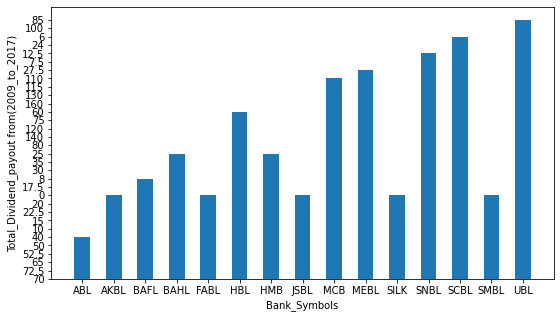

In [34]:
plt.figure(figsize=(9,5))

x ='Symbol'
y ='Dividend %'
plt.bar(x,y,data=all_banks_data,width=0.5)

plt.xlabel("Bank_Symbols")
plt.ylabel("Total_Dividend_payout from(2009_to_2017)")

plt.show()

<ipython-input-76-1090447b742f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys,rotation='vertical',size=8)
<ipython-input-76-1090447b742f>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


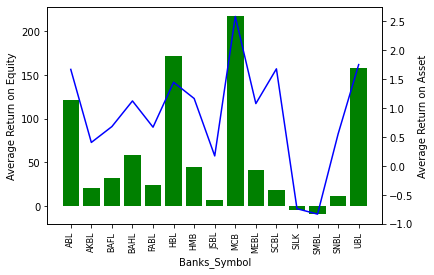

In [76]:
return_on_asset =all_banks_data.groupby(['Symbol']).mean()["ROA"]
return_on_equity =all_banks_data.groupby(['Symbol']).mean()["ROE"]
add_Symbol=all_banks_data.groupby(['Symbol'])

keys=[symbol for symbol,df in add_Symbol ]

fig , ax1=plt.subplots()

ax2 =ax1.twinx()
ax1.bar(keys,return_on_equity,color='g')
ax2.plot(keys,return_on_asset,color='b')
ax1.set_xlabel('Banks_Symbol')
ax1.set_ylabel('Average Return on Equity')
ax2.set_ylabel('Average Return on Asset')
ax1.set_xticklabels(keys,rotation='vertical',size=8)
fig.show()